# **Computer Exercise 2. Segmentation**
## 1. Introduction

This computer exercise reviews some of the concepts presented in the chapter about algorithms for segmentation. The exercise reviews the following algorithms:


*   Canny Method
*   Hough Transforms for Line Detection
* Hough Transform for Circle Detection
* Watershed Segmentation
* Interactive Segmentation using GrabCuts

This exercise is presented as a Jupyter Notebook and specially designed to be executed at Google Colab. The experience introduces the Image Processing library **OpenCV**, which is very popular. OpenCV and Scikit Images (introduce in the previous computer exercise are the most popular libraries for image processing in Python). *Please, be careful with the names of the files since OpenCV is sensible to character capitalizations.*

This Notebook will guide you through the execution of the different exercises. You will find questions (marked in bold) that you have to answer in the Notebook.

**IMPORTANT: To deliver the exercise print the ipynb in PDF format and deliver the resulting PDF File.**

**DO NOT DELIVER THE NOTEBOOK IN IPYNB FORMAT.**

As we mentioned, this exercise is implemented using a very well known image processing library called **OpenCV** for Python. This library was originated in the 90s when Intel created a set of software modules for audio and video processing. The main objective of Intel was to demonstrate that their processors were also capable of working in multimedia applications, were Apple and Motorola dominated the scene in those days. The libraries were called Integrated Primitive Libraries and were made open to the community in 1999. Open source community has been contributing with several modules to the library and today is one of the most powerful libraries for image processing, computer vision and machine learning. The libraries were originally created in C++ and wrappers for Python were provided. Usually, when developing a computer vision program the algorithms are first tested in Python or iPython and later optimized in C++ for improving the performance.

Intel, once the  source code for these libraries was published continued with an independent, highly optimized implementation of audio and video signal processing that is known today as** IPP (Integrated Performance Primitive Libraries**). These libraries are top-performance for very basic multimedia tasks such as compression and decompressing video, cryptography, signal processing, etc. In this computer exercise we have selected the OpenCV libraries instead the scikit-image software package that was used in a previous exercise for academic reasons. Both packages are very popular in Image Processing and Computer Vision and all the examples in this exercise could be implemented in any of them. **We have selected OpenCV to provide the student different options when selecting Image Processing libraries. **
Apart from scikit-images and OpenCV we may find other open image processing libraries for Python such as NumPy, SciPy, PIL and more.







## Working in Colab

Working in Google Colab is very easy. Colab is a web environment for executing Python which is specially dedicated to computer vision and artificial intelligence. You can test your programs in the web without installing Python or any other libraries in your computer. The environment is though for interactive development of algorithms and learning AI and Computer Vision. Google also provides access to powerful GPU K80 Tesla where you can test your programs.

In order to execute Colab you need to run Jupyter Notebooks (like this one), that combine text with code. You also have to upload all your files to Google Drive. The system will not work with your local files. (It has a mode for working with local files but in this case the execution of the code is also performed locally).

So, you will need to upload this ipynb to your drive and enter to the link colab.research.google.com where you will find the details for execution.


##Part 1. Canny Method for edge detection

The first part of the exercise consist in using the Canny method to extract the edges of an image. We will test the software with the image “Nadal_Federer_2017OpenAustralia.jpg”. This image have been captured from an screenshot of a video played at Youtube.

The first part of the software opens the image, converts it to gray level and visualizes the result. The second part will apply the Canny algorithm.



**First step** You will have to upload your files to your drive. In the next cell we mount the drive to have access to it from google.colab

Please follow the instructions

In [32]:
# Mounting your drive to be used by Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We begin changing the directory. You will have to define the directory where you have uploaded your images. In my case it is in 'Image Computer Exercises'.

The rest of the code opens the image, converts it to gray levels and represents it. (Note: matplotlib is a library for plotting graphics, with functions that are paralel to Matlab, numpy is a library for matrix computations)

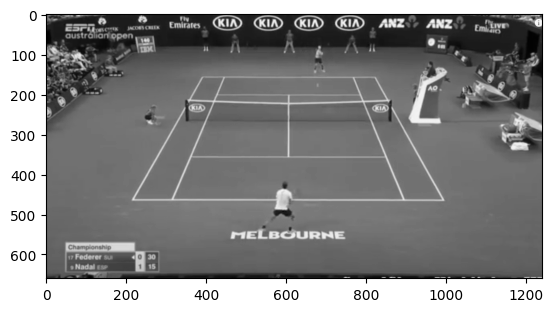

(<matplotlib.image.AxesImage at 0x7ecddf923970>, None)

In [33]:
import os, sys      #Libraries including operating system commands
import cv2          # The OpenCV library
import numpy as np  # Numpy library, for matrix computations
import matplotlib.pyplot as plt #Matplotlib library, for graphics

os.chdir("/content/drive/My Drive/Colab Notebooks/CE2/CE2")

# Part 1. Canny Edge Detection

#Opening and converting the image to Black and White

img1=cv2.imread('Nadal_Federer_2017OpenAustralia.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # Converting to gray levels
cv2.imwrite('tennis_bw.jpg',gray1)              # Saving image into disc

plt.imshow(gray1,cmap = 'gray'),plt.show()      # Showing the results


### The canny filtering ###
The implementation in OpenCV requires the Gaussian filter to be applied before hand. See OpenCV documentation to understand the details of the parameters.

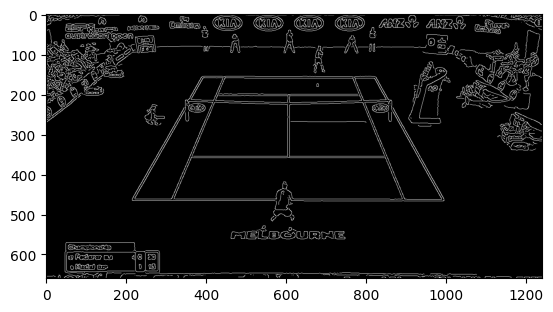

True

In [34]:
#%% Finding edges using Canny method

#Optional prefiltering the image
gray1 = cv2.GaussianBlur(gray1,(15,15),1.4,0)

edges = cv2.Canny(gray1,40,20)
plt.imshow(edges,cmap = 'gray'),plt.show()
cv2.imwrite('edges_tennis.jpg',edges)


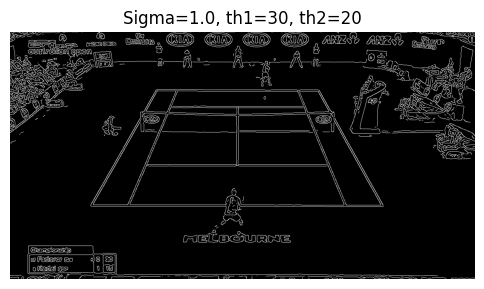

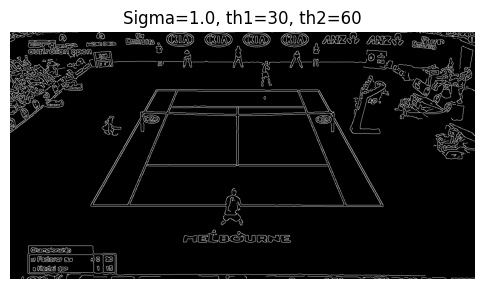

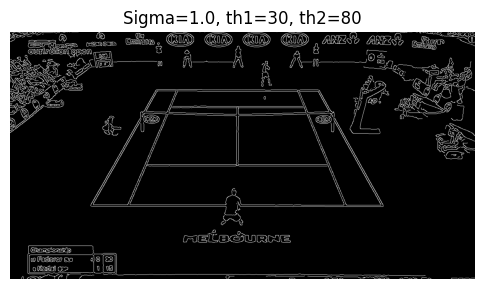

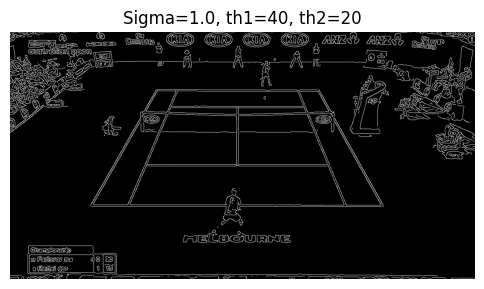

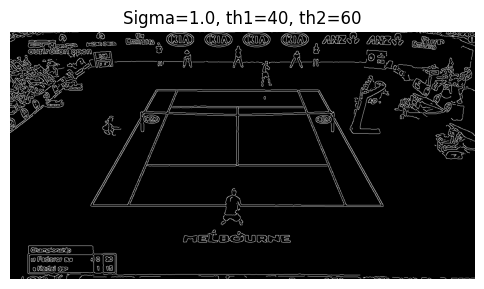

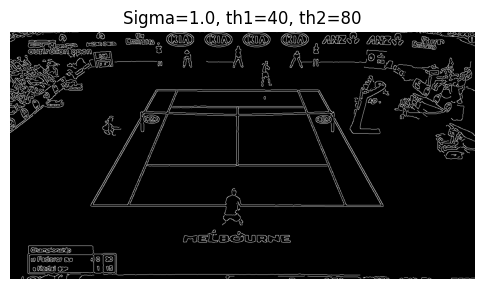

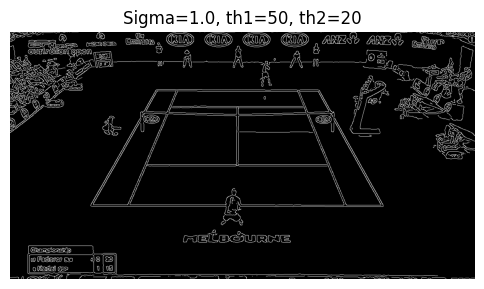

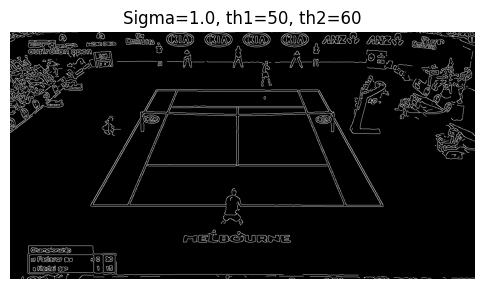

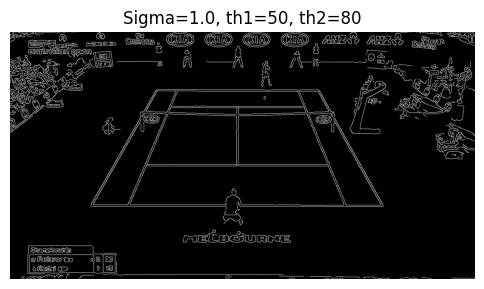

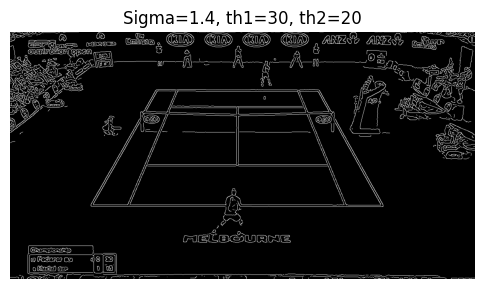

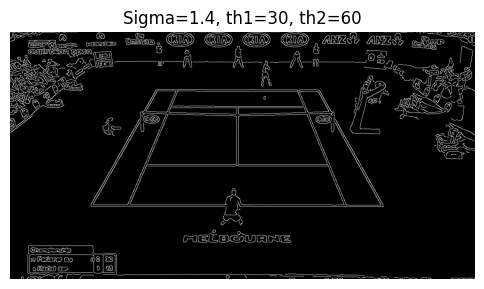

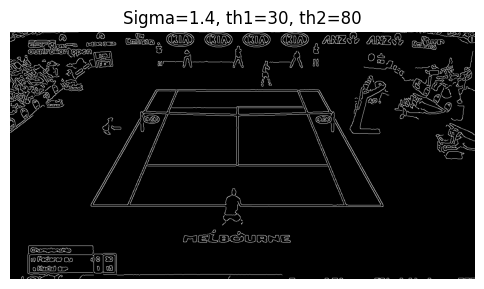

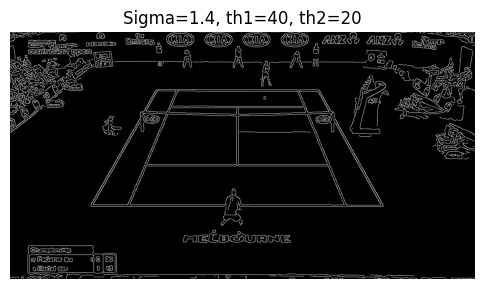

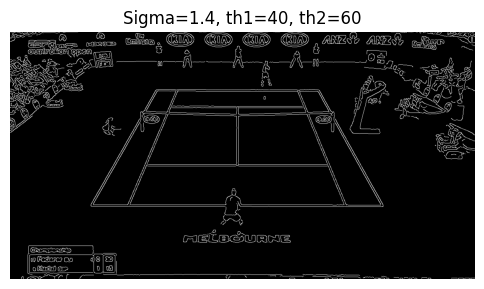

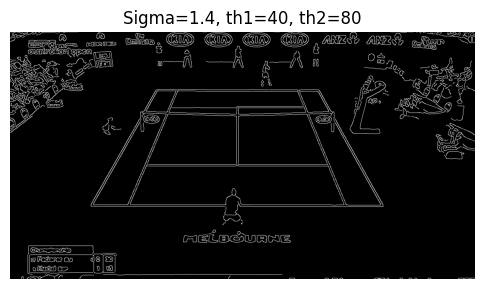

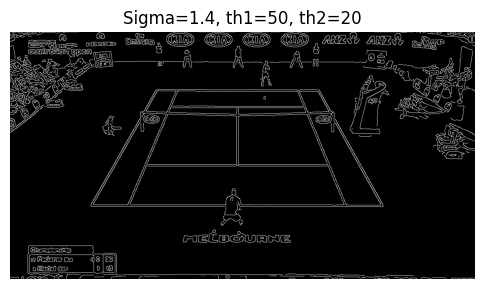

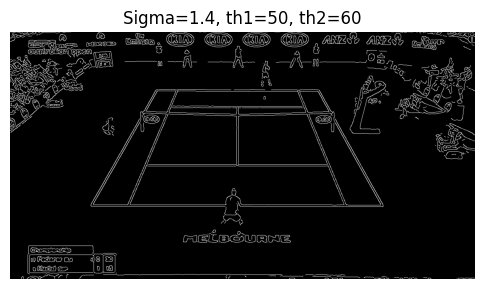

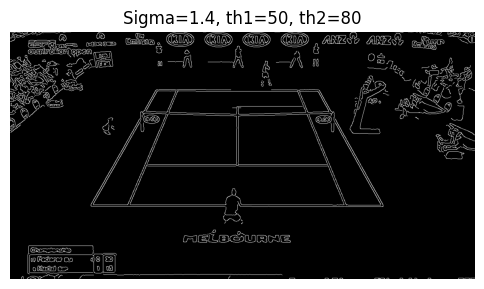

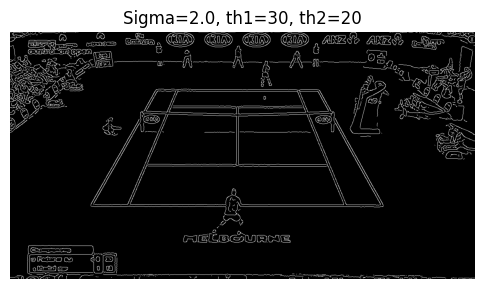

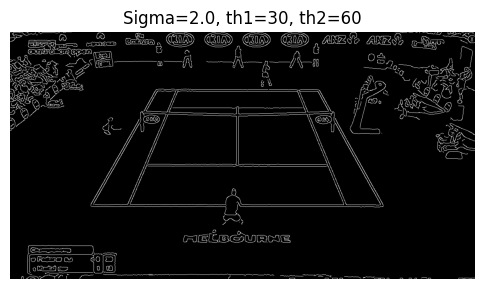

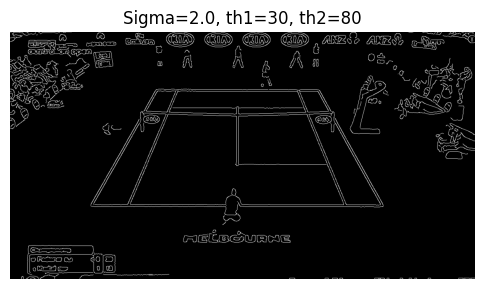

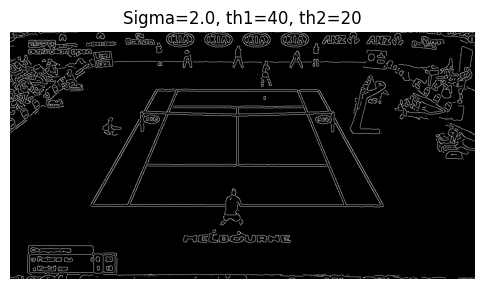

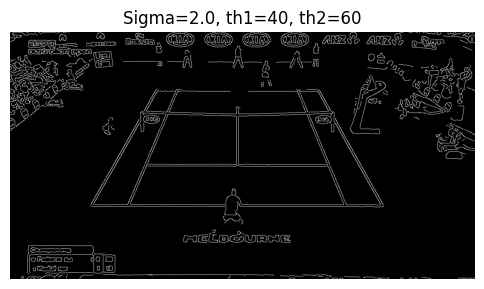

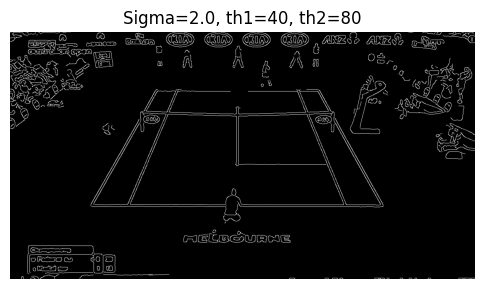

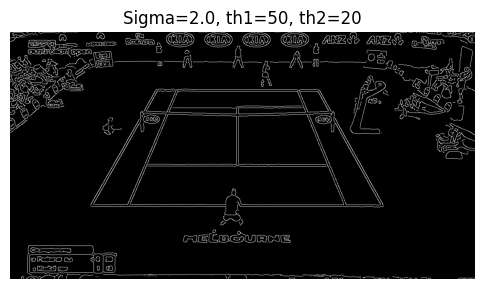

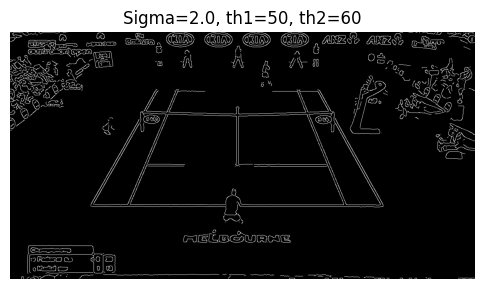

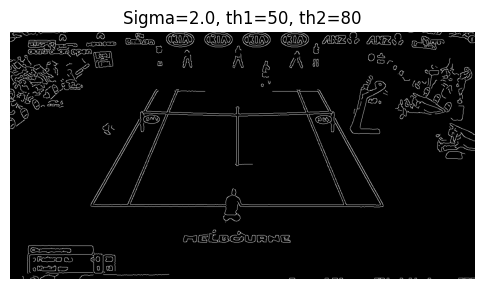

In [35]:
img=cv2.imread('Nadal_Federer_2017OpenAustralia.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#values for sigma, th1, and th2
sigma_values = [1.0, 1.4, 2.0]
th1_values = [30, 40, 50]
th2_values = [20, 60, 80]

for sigma in sigma_values:
    blurred = cv2.GaussianBlur(gray, (15, 15), sigmaX=sigma, sigmaY=0)

    for th1 in th1_values:
        for th2 in th2_values:
            #edge detection
            edges = cv2.Canny(blurred, threshold1=th1, threshold2=th2)

            #saving the result
            plt.figure(figsize=(6, 6))
            plt.imshow(edges, cmap='gray')
            plt.title(f'Sigma={sigma}, th1={th1}, th2={th2}')
            plt.axis('off')
            plt.show()

            output_filename = f'edges_sigma{sigma}_th1-{th1}_th2-{th2}.jpg'
            cv2.imwrite(output_filename, edges)

#Question 1.
***Try with different parameters of sigma, th1 and th2 and select a set of parameters that finds the edges of the image with acceptable quality. Explain if the selection of the parameters is critical or not.***

#Answer
After experiments with the set of parameters, the set sigma = 1, th1=40 and th2=20 provides best results (even the edges of the net is clearly visible).</span>

The selection of parameters is very important as seen in the experiment. Low sigma with low thresholds results in more detailed edges but may include noise and irrelevant features.
High sigma with high thresholds simplify the edge map by focusing on stronger, more prominent edges but may miss finer details. So a balanced set like low sigma and moderate threshold is selected.


#Question 2.
**Capture another frame from the last final tournament in Wimbledon or Roland Garros from any video in YouTube (If you estimate the probability of selecting the same frame in a group of 5 students you should realize that is extremely low ;-). Select the best parameter of Canny method for that image. Include the image and the canny detection in the document and save the files in jpeg format.**

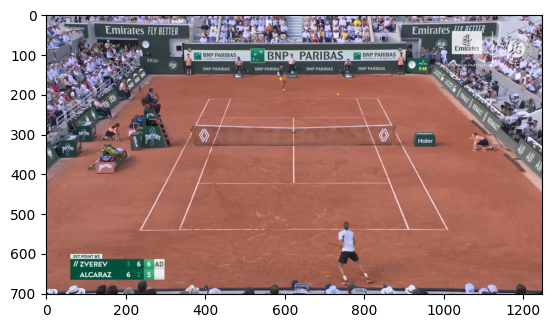

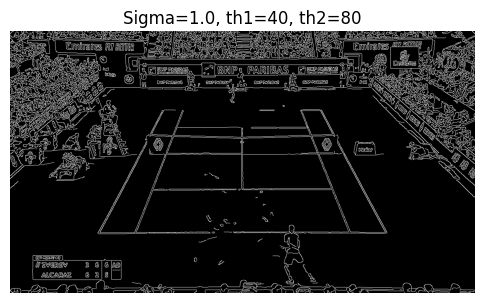

In [36]:
img=cv2.imread('rollandgarros2024.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image in RGB format
plt.imshow(img_rgb)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#values for sigma, th1, and th2
sigma_values = [1.0]
th1_values = [40]
th2_values = [80]

for sigma in sigma_values:
    blurred = cv2.GaussianBlur(gray, (15, 15), sigmaX=sigma, sigmaY=0)

    for th1 in th1_values:
        for th2 in th2_values:
            #edge detection
            edges = cv2.Canny(blurred, threshold1=th1, threshold2=th2)

            #saving the result
            plt.figure(figsize=(6, 6))
            plt.imshow(edges, cmap='gray')
            plt.title(f'Sigma={sigma}, th1={th1}, th2={th2}')
            plt.axis('off')
            plt.show()

            output_filename = f'New_test_edges_sigma{sigma}_th1-{th1}_th2-{th2}.jpeg'
            cv2.imwrite(output_filename, edges)

#Answer

##Part 2. Hough Transform - Line Detection

Now we will apply the Hough transform for line detection. In the following code block you find some code in Python that finds the Hough transform for lines and generates and image where the detected lines are superimposed with the gray image. Find the details of the instructions at the documentation.

You will see that some of the parameters can be optimized for detecting more or less lines. The program has been intentionally left with non-optimum parameters. Try to understand the role of the different parameters and play with them until you obtain a satisfactory detection of the court lines (possibly, not all the lines in the court would be detected but try to do your best, you finally will have to choose some trade-off).


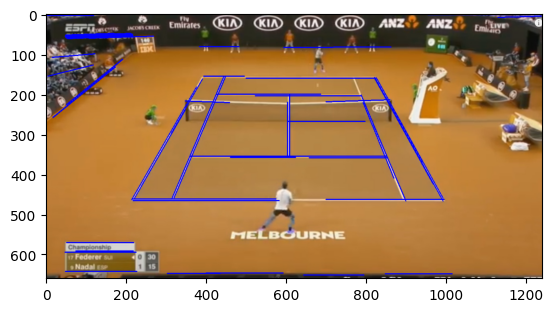

True

In [37]:
# Part 2. Hough Transform - Line detection

#After Canny we perform the Hough Transform for Line Detection (Probabilistic)

img1=cv2.imread('Nadal_Federer_2017OpenAustralia.jpg')
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 40, 80)

lines = cv2.HoughLinesP(edges,rho=.85,theta = np.pi/180,threshold = 90, minLineLength=100,maxLineGap=10)

N = lines.shape[0]
for i in range(N):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img1,(x1,y1),(x2,y2),(0,0,255),2)


plt.imshow(img1,cmap = 'gray'),plt.show()
cv2.imwrite('Lines_Hough.jpg',img1)

#Question 3.
**Describe the parameters that you have adjusted in order to improve the detection of lines. Explain what these parameters do and write the values that you finally have selected. Try the same values with the image that you have captured from another final Grand Prix Tournament. Include the screen capture of the final images with the superimposed line detection.**



#Answer
rho: Defines the distance resolution in pixels. A smaller value improves precision, while larger values might reduce accuracy. I used rho = .85 to for precision and performance.

theta: Controls the angular resolution of the Hough transform. I used theta = np.pi/180 (1 degree) to ensure fine angular resolution, capturing lines accurately at various angles.

threshold: Sets the minimum number of votes required to consider a line. A higher value filters out noise. I set it to threshold = 90 to detect only strong lines, avoiding noise.

minLineLength: Filters out short line segments. I set minLineLength = 100 to ensure only longer, relevant lines (like court lines) are detected, ignoring small noise.

maxLineGap: Defines the allowed gap between segments to connect them. I used maxLineGap = 10 to merge segments that are close, ensuring continuous court lines are detected.

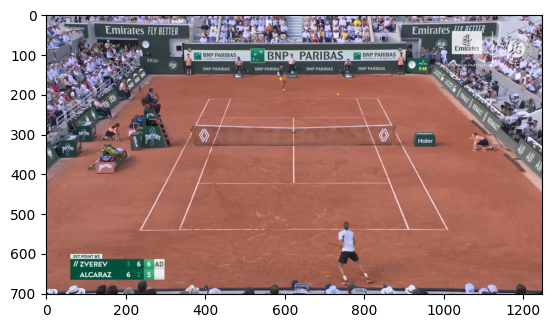

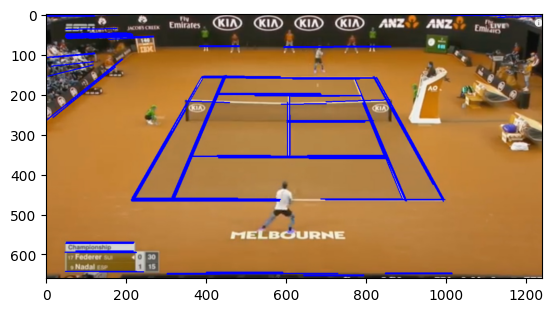

True

In [38]:
img=cv2.imread('rollandgarros2024.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image in RGB format
plt.imshow(img_rgb)
plt.show()
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 40, 80)

lines = cv2.HoughLinesP(edges,rho=.85,theta = np.pi/180,threshold = 90, minLineLength=100,maxLineGap=10)

N = lines.shape[0]
for i in range(N):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img1,(x1,y1),(x2,y2),(0,0,255),2)


plt.imshow(img1,cmap = 'gray'),plt.show()
cv2.imwrite('NewLines_Hough.jpg',img1)

## Part 3. Hough Transform - Circle Detection

In this part of the exercise we will try to detect the circles of the COINS image that was used in the first computer exercise.

This part of the program opens the image, resize to one quarter the number of pixels, converts it to gray level, low pass-filters and finally applies an algorithm based on circular Hough Transform for detecting the number of circles and their position. The circle detection algorithm works directly with the gray level images and performs Canny edge detection inside the function. The different parameters of the algorithm have been carefully adjusted in order to work well consistently with the example image. Try to execute the software and identify the most critical parameters such as the low pass filter size, the maximum and minimum radii of the detected circles, etc.

To appreciate the quality of the result it is suggested to open the image Circles_Hough.jpg that has been generated in the working directory of Colab Google in your Google Drive. Open that image 'Circles_Hough.jpg' because the resolution of the Colab Graphics interface do not permit to see the circles with precision.

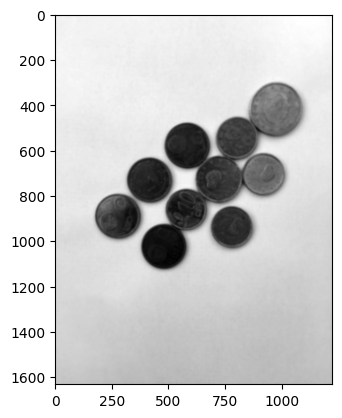

[416 734 100]
[276 892 100]
[778 940  92]
[582 582 100]
[ 480 1026  100]
[722 732 103]
[578 862  92]
[798 540  87]
[916 708  95]
[976 418 114]


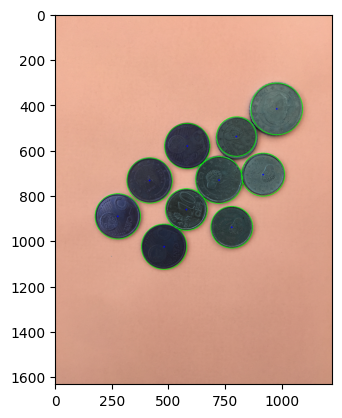

True

In [39]:
# Part 3. Hough Transform - Circle Detection

# Detecting circles, part II, working with the coins images of previous exercises

img2 =cv2.imread('Monedas1.JPG')

img2 = cv2.resize(img2,(int(img2.shape[1]/2),int(img2.shape[0]/2)))
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Low pass filtering the image  usually produces better results
gray2 = cv2.GaussianBlur(gray2,(21,21),3.0,0)

plt.imshow(gray2,cmap = 'gray'),plt.show() # Showing the results

# Finding Hough using circle detectors (the algorithm performs Canny internally)

circles = cv2.HoughCircles(gray2,cv2.HOUGH_GRADIENT,1,40,
                            param1=50,param2=30,minRadius=70,maxRadius=150)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    print(i)
    # draw the outer circle
    cv2.circle(img2,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img2),plt.show()
cv2.imwrite('Circles_Hough.jpg',img2)


#Question 4.
**Open one of the images that you personally generated in the Computer Exercise 1 and verify if the algorithm is working when using the same parameters of the example. If not, adjust your parameters and include a screen capture of your final result. If some parameters have been changes explain why and give the new setting. Include an image of your final result in the report.**

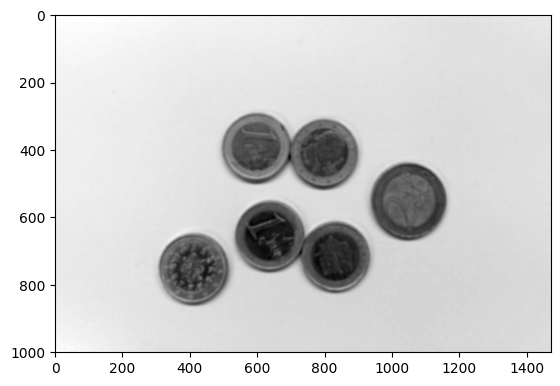

[410 750 103]
[1046  556  113]
[598 396 103]
[798 410  98]
[830 716 102]
[636 652 102]


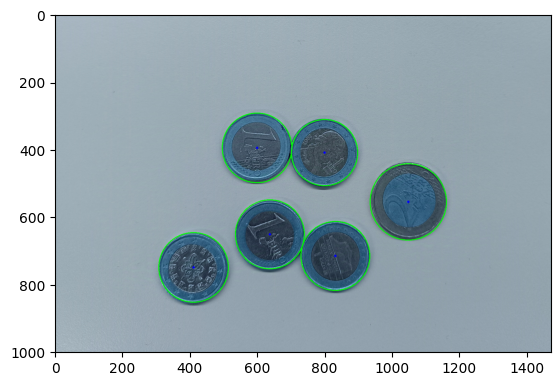

True

In [40]:
img2 =cv2.imread('CE1test.jpg')

img2 = cv2.resize(img2,(int(img2.shape[1]/2),int(img2.shape[0]/2)))
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Low pass filtering the image  usually produces better results
gray2 = cv2.GaussianBlur(gray2,(21,21),3.0,0)

plt.imshow(gray2,cmap = 'gray'),plt.show() # Showing the results

# Finding Hough using circle detectors (the algorithm performs Canny internally)

circles = cv2.HoughCircles(gray2,cv2.HOUGH_GRADIENT,1,40,
                            param1=50,param2=30,minRadius=70,maxRadius=150)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    print(i)
    # draw the outer circle
    cv2.circle(img2,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img2),plt.show()
cv2.imwrite('Circles_Hough.jpg',img2)


#Answer
the algorithm is working when using the same parameters of the example. No setting is changed. The result is attached.

#Question 5.
**A critical parameter of this circle detector is the low-pass filtering of the original image. Verify that if the image is not filtered the detection of the coins fails. Try to give an plausible explanation to this.**

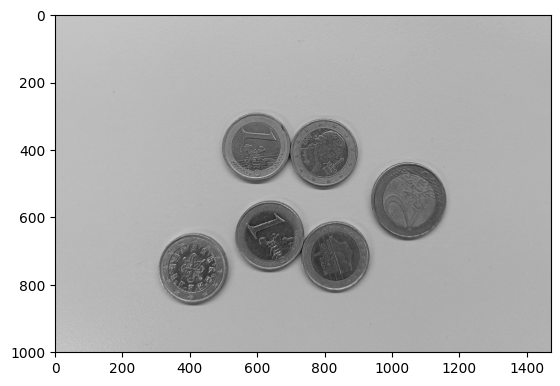

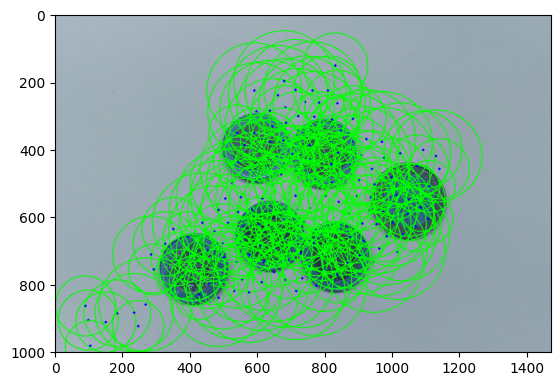

True

In [41]:
img2 =cv2.imread('CE1test.jpg')

img2 = cv2.resize(img2,(int(img2.shape[1]/2),int(img2.shape[0]/2)))
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Low pass filtering the image  usually produces better results
#gray2 = cv2.GaussianBlur(gray2,(21,21),3.0,0)

plt.imshow(gray2,cmap = 'gray'),plt.show() # Showing the results

# Finding Hough using circle detectors (the algorithm performs Canny internally)

circles = cv2.HoughCircles(gray2,cv2.HOUGH_GRADIENT,1,40,
                            param1=50,param2=30,minRadius=70,maxRadius=150)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
   # print(i)
    # draw the outer circle
    cv2.circle(img2,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img2),plt.show()
cv2.imwrite('Circles_Hough.jpg',img2)


#Answer

From the experiment it is clear that the detection fails if no low-pass is applied.

Plausible explanation-

False Positives from Gradients:
  The Hough Circle Transform works in part by analyzing the gradients (differences in intensity) within the image. Without filtering, high-frequency noise can create false gradients—sharp, small variations in brightness that the algorithm mistakes for actual edges.
  These false gradients cause the detection of circular shapes that are not real, leading to an excessive number of detected circles.

The raw image (without filtering) contains high-frequency variations or noise.
Without filtering, the Hough Circle Transform sees these noisy edges as potential circle boundaries. Since the algorithm searches for circular patterns, these tiny, irrelevant edges are detected as circles, causing the algorithm to over-detect and identify many circles that don't correspond to actual coins.

## Part 4. Segmentation using Watersheds
The watersehed segmentation is very critical with the number of seed regions that are originally defined. The implementation of watershed in OpenCV permits the user to specify a mask with different markers for the different foreground objects (using labels from 2 to K, the number of foreground objects), the label 1 is used for background objects and label 0 for unknown region. In this algorithm the flooding of the watersheds in done only from the specified locations. As a consequence, we have full control on the overall number of objects.

The exercise consist in a segmentation of the same COIN image used in the Computer Exercise #1 and in the previous exercise. If you analyze the code of Part 4, the general processing scheme for the Python version is the following:

-	Open image ‘monedas1.jpg’
-	Resize the image to ¼ factor
-	Convert to grayscale
-	Gaussian Filtering
-	Optimum thresholding (Otsu)
-	Apply morphological operations in order to find the areas where we have foreground objects, background objects and unknown regions
-	Label the different objects with unknown pixels equal to 0, background equal to 1 and the rest of coins (objects) with different integer labels
-	Apply watershed algorithm
-	Represent the watersheds of the resulting segmentation overlapped with the original image.

Try to execute the code and verify that the systems perfectly identifies the boundary regions of the image.

**Again, to see the results at full resolution open the image that has been generated at your Google Drive**


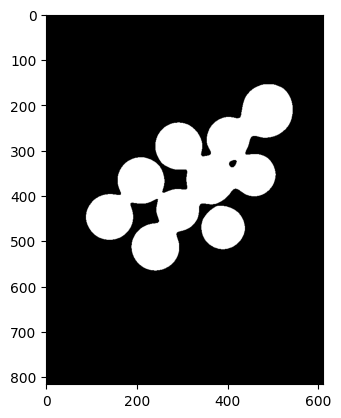

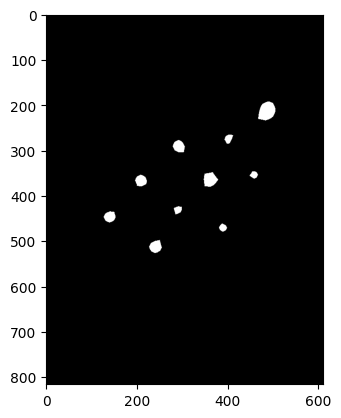

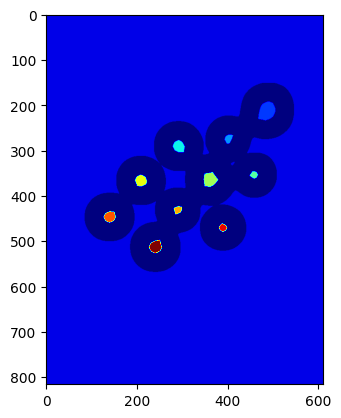

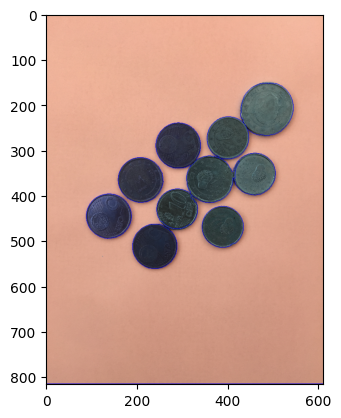

True

In [42]:
# Part 4. Watersheds to segment coins

#Image opening
img3 = cv2.imread('Monedas1.JPG')
img3 = cv2.resize(img3,(int(img3.shape[1]/4),int(img3.shape[0]/4)))
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
gray3 = cv2.GaussianBlur(gray3,(21,21),5.0,0)
ret, thresh = cv2.threshold(gray3,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,cmap = 'gray'),plt.show()
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(sure_fg,cmap = 'gray'),plt.show() # Showing the results

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers,cmap = 'jet'),plt.show() # Showing the results

markers = cv2.watershed(img3,markers)
img3[markers == -1] = [0,0,255]

plt.imshow(img3,cmap = 'jet'),plt.show() # Showing the results

cv2.imwrite('Watershed_Segmentation_out.jpg',img3)


#Question 6.
**Load the COINS image that you generated in Computer Exercise #1 and execute the watershed program section. Modify the different parameters at your convenience in order to improve the final segmentation. Give an image of the final segmentation and a summary of the parameters that you need to change.**

#Answer

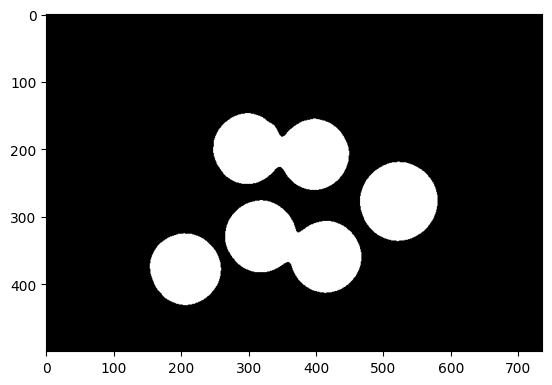

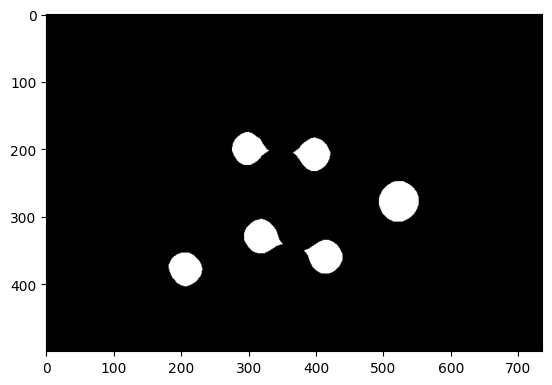

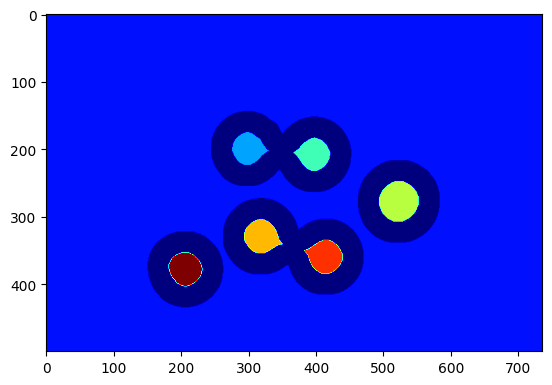

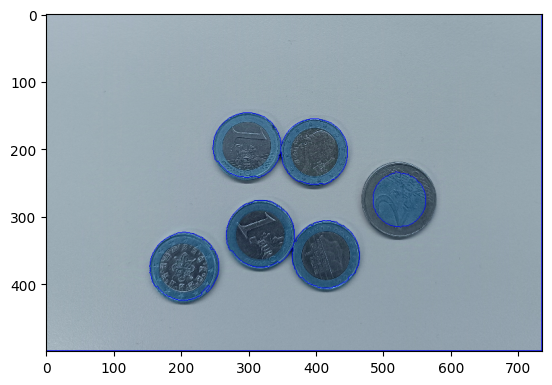

True

In [43]:
# Part 4. Watersheds to segment coins

#Image opening
img3 = cv2.imread('CE1test.jpg')
img3 = cv2.resize(img3,(int(img3.shape[1]/4),int(img3.shape[0]/4)))
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
gray3 = cv2.GaussianBlur(gray3,(15,15),4.0,0)
ret, thresh = cv2.threshold(gray3,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,cmap = 'gray'),plt.show()
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(sure_fg,cmap = 'gray'),plt.show() # Showing the results

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers,cmap = 'jet'),plt.show() # Showing the results

markers = cv2.watershed(img3,markers)
img3[markers == -1] = [0,0,255]

plt.imshow(img3,cmap = 'jet'),plt.show() # Showing the results

cv2.imwrite('Watershed_Segmentation_out.jpg',img3)


Although the segmentation worked quite well, I have changed some parameters for improvement.

I have changed the gaussian blur to (15,15) to less smoothen the image. Also, I reduced the sigma to 4.0

I have changed the sure foreground value to 0.5 and it produces a clear difference between the fore and background

## Part 5. GrabCut Example

In this part of the exercise we will use a function to estimate the segmentation of an image based on the GrabCut method. The script it is divided in 2 parts. The first part GrabCut is applied without any specific prior knowledge about the segmentation (a predefined rectangle is used as the initial approach). The segmentation obtained by the algorithm includes some of the background objects and misses part of the main object (Messi’s face). In the second part the algorithm is run with a  previously defined mask. The mask can be designed using layers in Photoshop o Paint and marking the foreground and background objects as white and black colors. In this cases, with this initial information about foreground and background objects it is possible to significantly improve the final result.

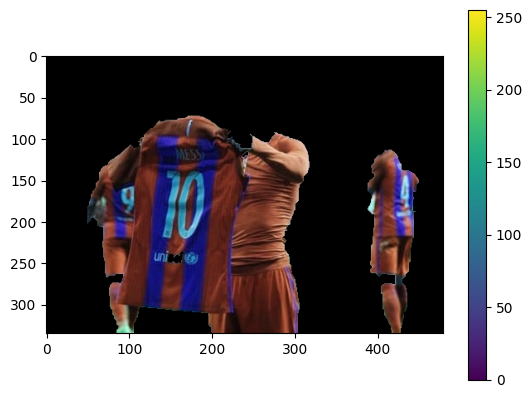

(<matplotlib.image.AxesImage at 0x7ece2048bbb0>,
 None)

In [44]:
#%%  Part 5. grab cut example
img = cv2.imread('Messi.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()


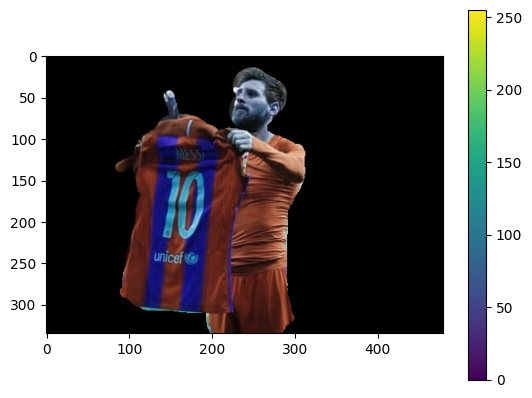

True

In [45]:
img = cv2.imread('Messi.jpg')
# newmask is the mask image I manually labelled
newmask = cv2.imread('Messi.png',0)
#newmask = cv2.cvtColor(newmask,cv2.COLOR_BGR2GRAY)
# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()
cv2.imwrite('Messi_GrabCut.jpg',img)

#Question 7.
**Select your own image to segment and try using GrabCut with and without initial information. Generate the mask for your object and show the results obtained for the 2 cases. Change the parameters if needed.**

#Answer

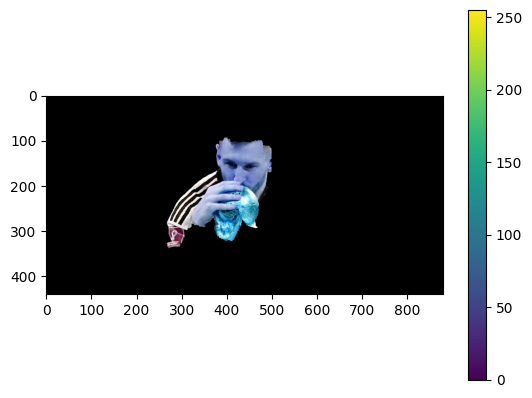

(<matplotlib.image.AxesImage at 0x7ecddf9b4ca0>,
 None)

In [46]:
#%%  Part 5. grab cut example
img = cv2.imread('messi-world-cup.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()


(440, 880) (440, 881)


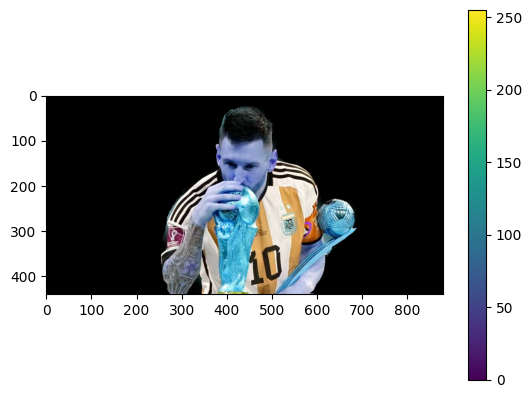

True

In [47]:
img = cv2.imread('messi-world-cup.jpg')
# newmask is the mask image I manually labelled
newmask = cv2.imread('Untitled.png',0)
#newmask = cv2.cvtColor(newmask,cv2.COLOR_BGR2GRAY)
# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
print(mask.shape, newmask.shape)

# Resize newmask to match mask
newmask_resized = cv2.resize(newmask, (mask.shape[1], mask.shape[0]))

# Now apply the assignment safely
mask[newmask_resized == 0] = 0
mask[newmask_resized == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()
cv2.imwrite('Messi_GrabCut.jpg',img)